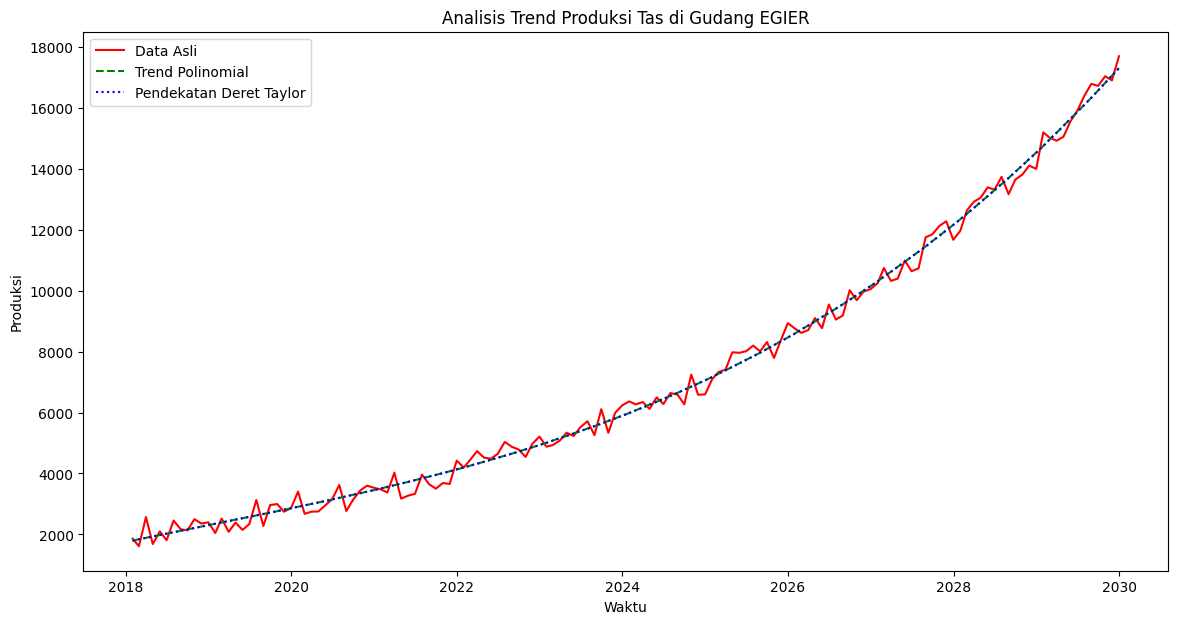

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340,
        3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
        3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644,
        5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
        6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012,
        8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
        10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915,
        13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
        16388, 16782, 16716, 17033, 16896, 17689]

months = pd.date_range(start='2018-01', periods=len(data), freq='M')

# Dataframe dari data
df = pd.DataFrame(data, index=months, columns=['Production'])

# Regresi polinomial derajat 3
degree = 3
X = np.arange(len(df))
y = df['Production'].values
coeffs = np.polyfit(X, y, degree)
poly_model = np.poly1d(coeffs)
y_poly_pred = poly_model(X)

# Fungsi polinomial derajat 3
def polynomial_function(x):
    return coeffs[0] * x**3 + coeffs[1] * x**2 + coeffs[2] * x + coeffs[3]

# Fungsi untuk deret Taylor di sekitar x_mean
x_mean = np.mean(X)
def taylor_series_approximation(x):
    f_x_mean = polynomial_function(x_mean)
    f_prime_x_mean = 3 * coeffs[0] * x_mean**2 + 2 * coeffs[1] * x_mean + coeffs[2]
    f_double_prime_x_mean = 6 * coeffs[0] * x_mean + 2 * coeffs[1]
    f_triple_prime = 6 * coeffs[0]

    approximation = f_x_mean + f_prime_x_mean * (x - x_mean) + f_double_prime_x_mean * (x - x_mean)**2 / 2 + f_triple_prime * (x - x_mean)**3 / 6
    return approximation

# Hitung pendekatan deret Taylor untuk semua nilai x
y_taylor_pred = [taylor_series_approximation(x) for x in X]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Production'], label='Data Asli', color='red')
plt.plot(df.index, y_poly_pred, label='Trend Polinomial', linestyle='--', color='green')
plt.plot(df.index, y_taylor_pred, label='Pendekatan Deret Taylor', linestyle=':', color='blue')
plt.legend()
plt.title('Analisis Trend Produksi Tas di Gudang EGIER')
plt.xlabel('Waktu')
plt.ylabel('Produksi')
plt.show()
